In [1]:
%matplotlib inline
from scipy.optimize import minimize
import numpy as np
import traml

In [2]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
          
        
        stack.d(i, x[i-1])
    #stack.d(1,x[0])
    #stack.d(2,x[1])
    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    min = 1-stack.average(TR, c, delta)
    #min = stack.average(TR, c, delta)
    #print min

    return min**10

In [3]:
def minTR(stack, film_range, c, delta, TR='R'):
    print film_range
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        #print i
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append((5,100))
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    #stack.plot()
    print layers
    return result

In [14]:
c = traml.Stack()

peak = 0.6
delta = 0.2
mat2 = 105401 #MgF2
sio2 = 111407 #SiO2
zns = 114701 #ZnS
zno = 112003 #ZnO
mgo = 110902 #MgO
#mat1 = 110104 #Al2O3
zro2 = 112101

c.add(zno,1000)
R=[]
R = [c.average('R', peak,delta)]
n = [0]
it = [1]

c.remove()


for i in range(0, 16):
    if i % 2 == 0:
        print 'even', i
        c.add(zns,20)
    else:
        c.add(sio2,20)
        
    c.add(zno, 1000)
    
    result = minTR(c, [1,len(c.config)-2], peak, delta, TR='T')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    it.append(result.nit)
   
    #c.table()
    print '============================================================================================'
    print c.average('R',peak,delta)
    c.remove()
    print '============================================================================================'
    
 

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 1000             | passive   |
even 0
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     114701 | 20               | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     114701 | 20               | passive   |
|   2 |     112003 | 1000             | passive   |
[1, 1]
[1]
0.132065940074
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --        

In [15]:
c.table()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     114701 | 5.0              | passive   |
|   2 |     111407 | 82.2928976372    | passive   |
|   3 |     114701 | 25.2118874975    | passive   |
|   4 |     111407 | 12.8718864958    | passive   |
|   5 |     114701 | 14.7038420982    | passive   |
|   6 |     111407 | 9.52461975633    | passive   |
|   7 |     114701 | 33.3397811196    | passive   |
|   8 |     111407 | 10.357185037     | passive   |
|   9 |     114701 | 12.5159836583    | passive   |
|  10 |     111407 | 16.5651096639    | passive   |
|  11 |     114701 | 14.5865783524    | passive   |
|  12 |     111407 | 19.7273744427    | passive   |
|  13 |     114701 | 9.48132968279    | passive   |
|  14 |     111407 | 21.5875304717    | passive   |
|  15 |     114701 | 11.8217104258    | passive   |
|  16 |     111407 | 17.9152023826    | passive   |


In [9]:
import matplotlib.pyplot as plt

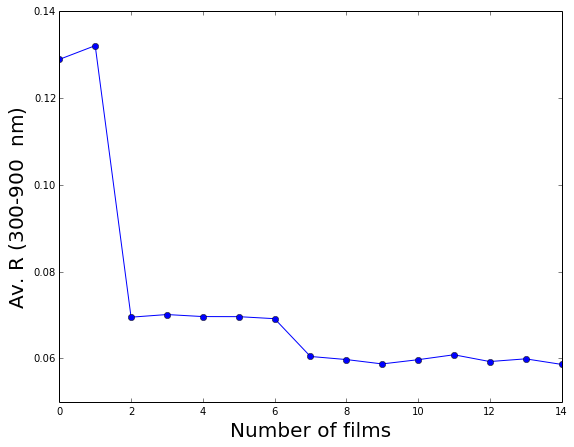

In [16]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

ax.plot(R, 'o-')
ax.set_xlim([0,14])
ax.set_xlabel(r'Number of films', fontsize=20)
ax.set_ylabel(r'Av. R ($300 - 900$  nm)', fontsize=20)


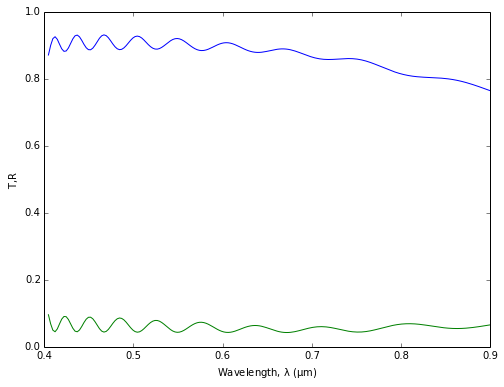

array([ 0.405     ,  0.40748744,  0.40997487,  0.41246231,  0.41494975,
        0.41743719,  0.41992462,  0.42241206,  0.4248995 ,  0.42738693,
        0.42987437,  0.43236181,  0.43484925,  0.43733668,  0.43982412,
        0.44231156,  0.44479899,  0.44728643,  0.44977387,  0.45226131,
        0.45474874,  0.45723618,  0.45972362,  0.46221106,  0.46469849,
        0.46718593,  0.46967337,  0.4721608 ,  0.47464824,  0.47713568,
        0.47962312,  0.48211055,  0.48459799,  0.48708543,  0.48957286,
        0.4920603 ,  0.49454774,  0.49703518,  0.49952261,  0.50201005,
        0.50449749,  0.50698492,  0.50947236,  0.5119598 ,  0.51444724,
        0.51693467,  0.51942211,  0.52190955,  0.52439698,  0.52688442,
        0.52937186,  0.5318593 ,  0.53434673,  0.53683417,  0.53932161,
        0.54180905,  0.54429648,  0.54678392,  0.54927136,  0.55175879,
        0.55424623,  0.55673367,  0.55922111,  0.56170854,  0.56419598,
        0.56668342,  0.56917085,  0.57165829,  0.57414573,  0.57

In [25]:
#c.add(zno, 1000)
c.remove()
c.set_range([0.4, 0.9])
c.plot()
c.average('R', peak, delta)
c.x




In [24]:
c.average('R', peak, delta)

0.057598256469931046

In [19]:
a = traml.Stack()
a.add(zno, 1000)

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 1000             | passive   |


(0.4, 0.9)

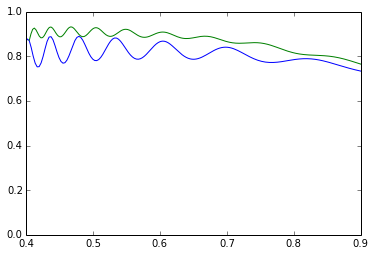

In [30]:
plt.plot(a.x, a.get_T(),)
plt.plot(c.x, c.get_T())
a.average('R', 0.6,0.3)
plt.xlim([0.4, 0.9])

In [ ]:
print d.average('R',0.5, 0.02)

In [ ]:
c.library.search('zro2')

In [ ]:
c.library.plot(112101)